In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

10 	 10


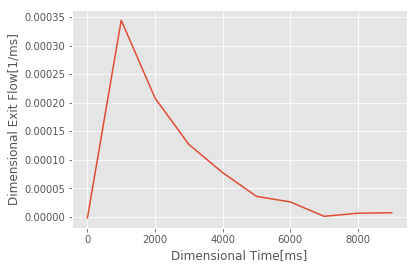

In [2]:
data_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat'
data_points = 10
epsilon = 1.0
length = 35.0

def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(100):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(data_file, "r"):
    if i%(10000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

## ファイルからの読み込み
```python;title
file_output()
```
* 入力 : file_name, T[mcs], $M$(モデルパラメータ)
* 出力 : $D_e^{(M=0)}, D_e^{(M=1)}, k_a, k_d, \sigma, E, dlogp$, pick, update, exchange rate ($\theta$.shape=(M, T))

In [3]:
def file_output_one(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 3<=l<=model.shape[0]+2:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+5)<=l<=(2*model.shape[0]+4):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+7):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [4]:
def file_output_two(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 4<=l<=model.shape[0]+3:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+6)<=l<=(2*model.shape[0]+5):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+8):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [5]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\February\\'

time = 25600
Temp = np.array([1, 2, 3, 4, 5], dtype=float)
beta = 1/Temp
print(beta)
model = 0.1*np.arange(0, 11, dtype=float)
print(model)

[ 1.          0.5         0.33333333  0.25        0.2       ]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [6]:
de0_one = ['zero', 'one', 'two', 'three', 'four']
de1_one = ['zero', 'one', 'two', 'three', 'four']
ka_one = ['zero', 'one', 'two', 'three', 'four']
kd_one = ['zero', 'one', 'two', 'three', 'four']
sigma_one = ['zero', 'one', 'two', 'three', 'four']
energy_one = ['zero', 'one', 'two', 'three', 'four']
dlogp_one = ['zero', 'one', 'two', 'three', 'four']
pick_one = ['zero', 'one', 'two', 'three', 'four']
update_one = ['zero', 'one', 'two', 'three', 'four']
exchange_one = ['zero', 'one', 'two', 'three', 'four']

In [7]:
for i in range(5):
    r_file = read_file_pass + 'debug_EM_TAP-sigma_datapoints=10_T=25600_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one[i], de1_one[i], ka_one[i], kd_one[i], sigma_one[i], energy_one[i], dlogp_one[i], pick_one[i], \
    update_one[i], exchange_one[i] = file_output_one(r_file, time, model)

In [8]:
print(exchange_one)

[array([  7797.,   9704.,  12161.,  13699.,  13311.,  13075.,   7929.,
         8915.,   2655.,    896.]), array([ 15146.,  12234.,  12805.,  13600.,  12975.,  13685.,  10845.,
         6144.,    816.,    982.]), array([  4648.,   2453.,  11997.,  15205.,  11375.,  13222.,  10661.,
         7240.,   1864.,    523.]), array([  4435.,   5266.,   8778.,   7601.,   8148.,   9761.,  10523.,
         9576.,   2019.,    794.]), array([  6233.,   4325.,   8567.,   8174.,  11226.,  11824.,   7376.,
         7321.,   4212.,   2336.])]


In [9]:
print(energy_one[1].shape)

(11, 25600)


In [10]:
print(energy_one[3])

[[ 23080.57851245  22659.12720247  23080.57851245 ...,    -96.11584948
     -96.11584948    -96.11584948]
 [ 22659.12720247  21834.29594797  14283.83712907 ...,   -104.16568808
    -104.16568808   -104.49959675]
 [ 22243.69968097  23080.57851245  19985.49778922 ...,   -101.58775816
    -101.60376597   -101.62181273]
 ..., 
 [ 19877.63411034  20642.96349344  20502.39552305 ...,    -86.39011048
     -87.02165855    -87.08500989]
 [ 19504.37310829  19876.29750231  20642.96349344 ...,    -99.47417891
     -99.47417891    -97.39896451]
 [ 19137.13589473  19504.37310829  19504.01354606 ...,   -104.44387919
    -104.44387919   -104.38279407]]


C:\Users\anbaigashi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))


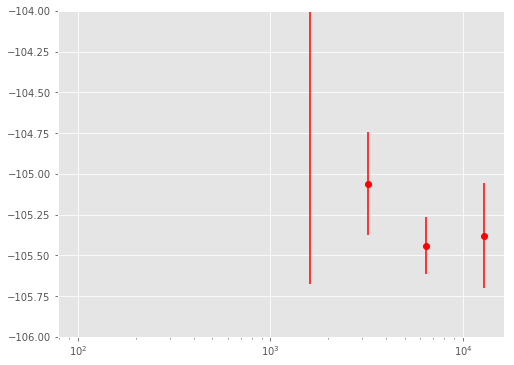

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xscale('log')

ondo = 10

t_0 = 100
start = t_0
end = 2*start
while start<25600:
    bar_A_i = np.zeros(5, dtype=float)
    for i in range(5):
        bar_A_i[i] = energy_one[i][ondo][start:end].mean()
    bar_A = bar_A_i.mean()
#    ax.scatter(start, bar_A, color='red')
#    print(bar_A)
    
    sig = 0.
    for i in range(5):
        sig += (bar_A_i[i]-bar_A)**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    
#    print(sig)
    
    ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red')
    
    start = end
    end *= 2

    
ax.set_ylim(-106, -104)
plt.show()

In [12]:
for i in range(15945, 15961):
    print(dlogp_one[3][0][i])
#     if dlogp_one[3][0][i] > 100:
#         print(i)

9.50048154614
9.50048154614
9.80368448881
9.80371159782
9.8036138775
9.50760927335
9.50772892191
9.50765942891
9.50782314678
9.50751152219
9.50768502556
9.50768502556
9.50767417876
9.5078619762
9.50840725396
9.18956071645


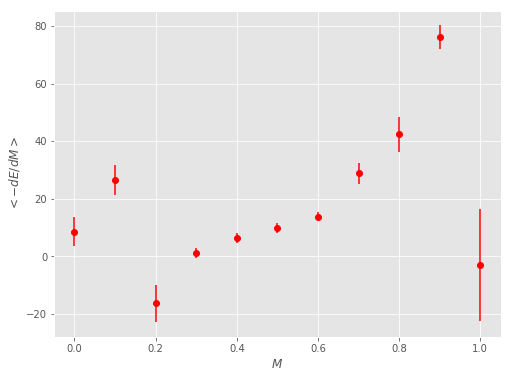

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 12800
end = 2*start

dlogp_m = np.zeros(11, dtype=float)
dlogp_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = dlogp_one[j][i][start:end].mean()
    dlogp_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-dlogp_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    dlogp_s[i] = sig

# sig = 0.
# for i in range(5):
#     sig += (bar_A_i[i]-bar_A)**2
# sig /= (bar_A_i.shape[0]-1)
# sig = np.sqrt(sig)
# sig /= np.sqrt(bar_A_i.shape[0])

# #    print(sig)

ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

#plt.savefig('teireikai_20190220_BayesFactorPath1.png')

plt.show()

In [14]:
from scipy import integrate

bayes_factor_upper_one = integrate.simps(dlogp_m+dlogp_s, 0.1*np.arange(11, dtype=float))
bayes_factor_lower_one = integrate.simps(dlogp_m-dlogp_s, 0.1*np.arange(11, dtype=float))

print(bayes_factor_upper_one)
print(bayes_factor_lower_one)

26.3740098276
18.1915283344


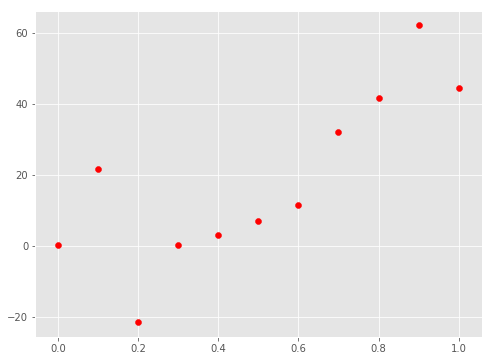

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dE = np.zeros([5, 11])

for i in range(11):
    dE[0, i] = dlogp_one[0][i, start:end].mean()
    
ax.scatter(model, dE[0], color='red')
    
plt.show()

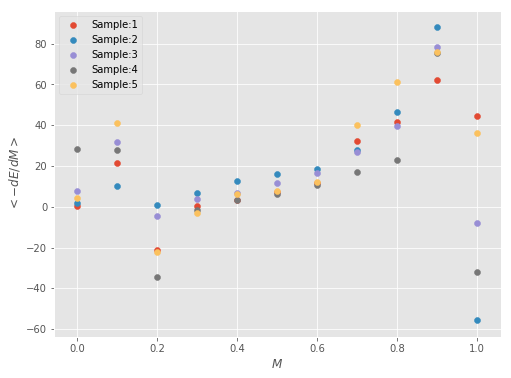

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
dE = np.zeros([5, 11])

for i in range(5):
    for j in range(11):
        dE[i, j] = dlogp_one[i][j, start:end].mean()
    
    ax.scatter(model, dE[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

In [17]:
x = np.random.randint(0, 5, 11)

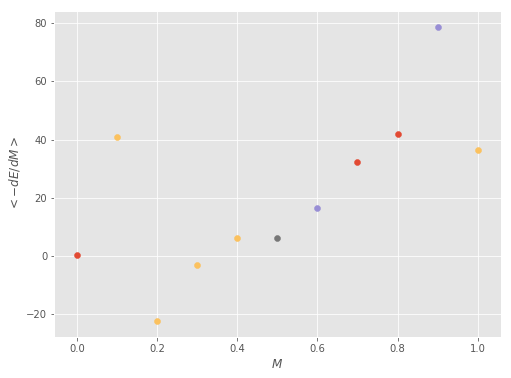

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(11):
    ax.scatter(model[i], dE[x[i], i], color=cycle[x[i]], label='Sample:{}'.format(x[i]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
#plt.legend()

plt.savefig('teireikai_20190220_BayesFactorPath1_fig3.png')
plt.show()

In [19]:
y = np.zeros(11)
for i in range(11):
    y[i] = dE[x[i], i]
print(y)
moment = integrate.simps(y, model)
print(moment)

[  0.46824751  41.0313109  -22.23962879  -3.20139354   6.22200929
   6.3020757   16.53776183  32.23321996  41.75532488  78.53135471
  36.4027212 ]
24.7002724689


In [20]:
N = 10
y = np.zeros([N, 11])
S = np.zeros(N)
for i in range(N):
    x = np.random.randint(0, 5, 11)
    for j in range(11):
        y[i, j] = dE[x[j], j]
    S[i] = integrate.simps(y[i], model)
        
#print(y);print(S)

In [21]:
print(S)
print(S.shape[0])
bar_S = S.mean()
sig_S = 0.
for i in range(N):
    sig_S += (S[i]-bar_S)**2
sig_S /= (S.shape[0]-1)
sig_S = np.sqrt(sig_S)
sig_S /= np.sqrt(S.shape[0])
print(bar_S, sig_S)
print(bar_S-sig_S, bar_S+sig_S)

[ 20.20281219  27.22153962  24.23665773  26.19819755  21.7500313
  24.97533787  23.9750106   26.60568273  18.86666128  25.15382107]
10
23.9185751942 0.882578618821
23.0359965754 24.8011538131


In [6]:
de0_two = ['zero', 'one', 'two', 'three', 'four']
de1_two = ['zero', 'one', 'two', 'three', 'four']
ka_two = ['zero', 'one', 'two', 'three', 'four']
kd_two = ['zero', 'one', 'two', 'three', 'four']
sigma_two = ['zero', 'one', 'two', 'three', 'four']
energy_two = ['zero', 'one', 'two', 'three', 'four']
dlogp_two = ['zero', 'one', 'two', 'three', 'four']
pick_two = ['zero', 'one', 'two', 'three', 'four']
update_two = ['zero', 'one', 'two', 'three', 'four']
exchange_two = ['zero', 'one', 'two', 'three', 'four']

In [7]:
for i in range(5):
    r_file = read_file_pass + 'debugEMbeta_TAP-sigma_datapoints=10_T=25600_Temp=1-5_replica=5_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_two[i], de1_two[i], ka_two[i], kd_two[i], sigma_two[i], energy_two[i], dlogp, pick_two[i], \
    update_two[i], exchange_two[i] = file_output_two(r_file, time, np.hstack((Temp, Temp)))

In [8]:
print(energy_two[1].shape)

(10, 25600)


In [9]:
print(exchange_two)

[array([  6789.,  10930.,  16472.,  19926.,   3697.,  19644.,  13017.,
        12615.,  11662.]), array([  3586.,   8536.,  19028.,  21914.,   8014.,  16312.,  15461.,
        13506.,  11966.]), array([  1834.,  15458.,  20505.,  21940.,   5431.,  21409.,  17657.,
         5911.,  10450.]), array([ 11892.,  12341.,  14564.,  18489.,   3549.,  15925.,  16569.,
        15523.,   9810.]), array([  5265.,  14297.,  18102.,  20868.,   4748.,  18158.,  14198.,
        10123.,   9055.])]


In [10]:
print(energy_two[4])

[[ 23080.57851245  23071.71915377  23071.71915377 ...,    -97.00574004
     -97.00574004    -97.00574004]
 [ 23080.57851245  23080.57851245  15011.35791453 ...,    -92.46449056
     -92.0307238     -92.1733453 ]
 [ 23080.57851245  23080.57851245  23080.57851245 ...,    -92.0307238
     -92.19030042    -92.0307238 ]
 ..., 
 [ 23080.57851245  19073.5162833   19137.13589473 ...,   -102.21597704
     -86.88996929    -97.33057673]
 [ 23080.57851245  23080.57851245  19073.5162833  ...,    -97.19686953
    -102.21597704   -102.21597704]
 [ 23080.57851245  19137.13589473  19137.13589473 ...,   -105.23237493
    -105.23237493   -105.85554368]]


In [11]:
def dlog_p(model, diffusivity_0, diffusivity_1, k_a, k_d, 
           std, time=dimensional_time, artificial_flow=dimensional_exit_flow, 
           epsilon=epsilon, length=length):
    
    dlogp = -1./(std**2) \
            *(
                 (Flow(diffusivity=diffusivity_0, k_a=0, k_d=0, time=time, epsilon=epsilon, length=length) \
                  - Flow(diffusivity=diffusivity_1, k_a=k_a, k_d=k_d, time=time, epsilon=epsilon, length=length)) \
                 *(artificial_flow - (1-model)*Flow(diffusivity=diffusivity_0,
                                                    k_a=0, k_d=0,
                                                    time=time, epsilon=epsilon, length=length) \
                   - model*Flow(diffusivity=diffusivity_1, 
                                k_a=k_a, k_d=k_d, 
                                time=time, epsilon=epsilon, length=length)\
                   )
              ).sum()
           
    return dlogp

print(dlog_p(1., 1.49, 1.5, 20, 5, 5*10**-6))

-25.6943189783


In [13]:
%%time

dlogp_two_m1 = np.zeros([5, 25600])
dlogp_two_m0 = np.zeros([5, 25600])

for i in range(5):
    for j in range(25600):
        dlogp_two_m0[i, j] = dlog_p(0, de0_two[i][4][j], de1_two[i][4][j], ka_two[i][4][j], kd_two[i][4][j], 
                             sigma_two[i][4][j])
        dlogp_two_m1[i, j] = dlog_p(1, de0_two[i][5][j], de1_two[i][5][j], ka_two[i][5][j], kd_two[i][5][j], 
                             sigma_two[i][5][j])

Wall time: 25min 27s


In [32]:
for i in range(5):
    for j in range(25600):
        if de0_two[4][i][j] < 0:
            print(i, j)

In [20]:
print(dlogp_two_m0.shape)
print(dlogp_two_m1)

(5, 25600)
[[  3.64225319e+03   3.64225319e+03   3.67643221e+03 ...,  -1.01518315e+00
   -4.40945964e+00   1.04538317e+00]
 [  3.64225319e+03   3.64225319e+03   3.64225319e+03 ...,   4.70240668e+00
    3.49298999e+00   1.36815946e+00]
 [  3.64225319e+03   3.65696030e+03   3.65476928e+03 ...,  -7.63763536e+00
   -3.43190326e+00  -7.61524192e+00]
 [  3.64225319e+03   3.65490679e+03   3.63664866e+03 ...,  -1.02596168e+01
    7.87597651e-01  -1.62499961e+01]
 [  3.64225319e+03   3.66192799e+03   3.65068315e+03 ...,  -1.38825040e+01
   -2.96801008e+00  -2.97986534e+00]]


C:\Users\anbaigashi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))


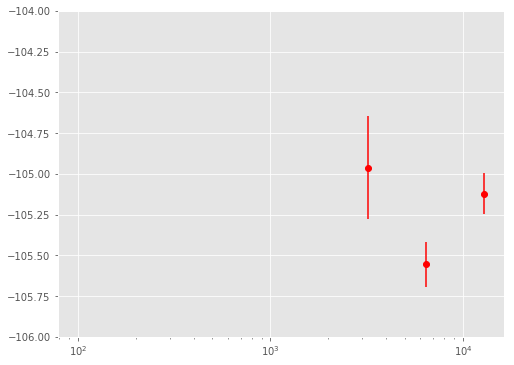

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xscale('log')

ondo = 9

t_0 = 100
start = t_0
end = 2*start
while start<25600:
    bar_A_i = np.zeros(5, dtype=float)
    for i in range(5):
        bar_A_i[i] = energy_two[i][ondo][start:end].mean()
    bar_A = bar_A_i.mean()
#    ax.scatter(start, bar_A, color='red')
#    print(bar_A)
    
    sig = 0.
    for i in range(5):
        sig += (bar_A_i[i]-bar_A)**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    
#    print(sig)
    
    ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red')
    
    start = end
    end *= 2

    
ax.set_ylim(-106, -104)
plt.show()

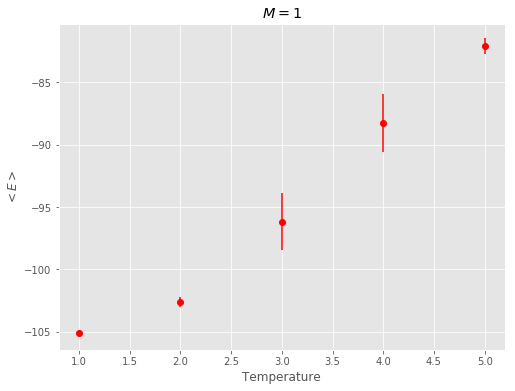

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 12800
end = 2*start

energy_m1_m = np.zeros(5)
energy_m1_s = np.zeros(5)

for i in range(5):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two[j][9-i][start:end].mean()
    energy_m1_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m1_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_m1_s[i] = sig

ax.set_xlabel('Temperature')
ax.set_ylabel('$<E>$')
ax.set_title('$M=1$')
ax.errorbar(np.arange(1, 6), energy_m1_m, yerr=energy_m1_s, fmt='o', color='red')

#plt.savefig('teireikai_20190220_BayesFactorPath2_FirstTerm.png')

plt.show()

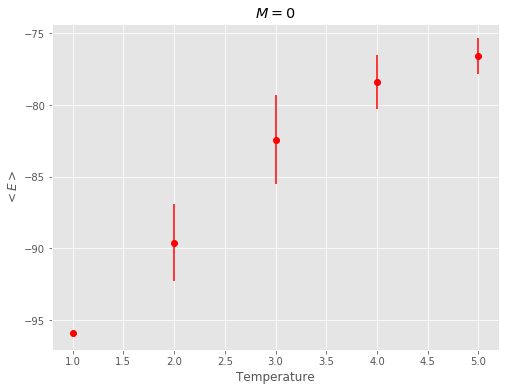

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 12800
end = 2*start

energy_m0_m = np.zeros(5)
energy_m0_s = np.zeros(5)

for i in range(5):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_two[j][i][start:end].mean()
    energy_m0_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m0_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_m0_s[i] = sig

ax.set_xlabel('Temperature')
ax.set_ylabel('$<E>$')
ax.set_title('$M=0$')
ax.errorbar(np.arange(1, 6), energy_m0_m, yerr=energy_m0_s, fmt='o', color='red')

#plt.savefig('teireikai_20190220_BayesFactorPath2_SecondTerm.png')

plt.show()

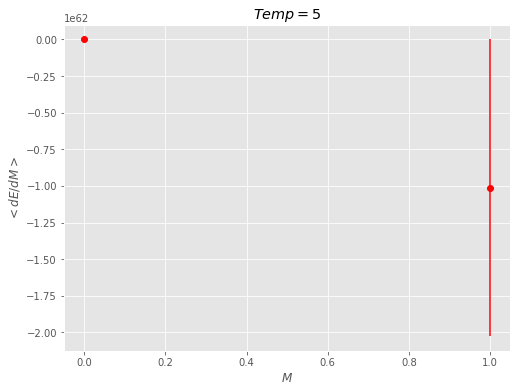

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dlogp_m0_m = 0. 
dlogp_m0_s = 0.
dlogp_m1_m = 0.
dlogp_m1_s = 0.

start = 12800
end = 2*start

bar_A_i = np.zeros(5, dtype=float)
for i in range(5):
    bar_A_i[i] = dlogp_two_m0[i][start:end].mean()
dlogp_m0_m = bar_A_i.mean()

sig = 0.
for i in range(5):
    sig += (bar_A_i[i]-dlogp_m0_m)**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
dlogp_m0_s = sig


bar_A_i = np.zeros(5, dtype=float)
for i in range(5):
    bar_A_i[i] = dlogp_two_m1[i][start:end].mean()
dlogp_m1_m = bar_A_i.mean()

sig = 0.
for i in range(5):
    sig += (bar_A_i[i]-dlogp_m1_m)**2
sig /= (bar_A_i.shape[0]-1)
sig = np.sqrt(sig)
sig /= np.sqrt(bar_A_i.shape[0])
dlogp_m1_s = sig

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
ax.set_title('$Temp=5$')
ax.errorbar(np.array([0, 1]), np.array([dlogp_m0_m, dlogp_m1_m]),
            yerr=np.array([dlogp_m0_s, dlogp_m1_s]), fmt='o', color='red')


#plt.savefig('teireikai_20190220_BayesFactorPath2_ThirdTerm.png')
plt.show()

In [19]:
print(dlogp_m0_m, dlogp_m1_m)
print(dlogp_m0_s, dlogp_m1_s)

2.19080972209e+52 -1.01235767403e+62
2.19080972209e+52 1.01235767403e+62


In [ ]:
dlogp_m0_m = 64.7380658835
dlogp_m1_m = -62.7548612679
dlogp_m0_s = 21.364298456
dlogp_m0_s = 26.4974012929

In [33]:
from scipy import integrate

first_term_upper_two = integrate.simps((energy_m1_m+energy_m1_s), 1/np.arange(1, 6))
first_term_lower_two = integrate.simps((energy_m1_m-energy_m1_s), 1/np.arange(1, 6))

second_term_upper_two = integrate.simps((energy_m0_m+energy_m0_s), 1/np.arange(1, 6))
second_term_lower_two = integrate.simps((energy_m0_m-energy_m0_s), 1/np.arange(1, 6))

third_term_upper_two = integrate.simps((np.array([dlogp_m0_m, dlogp_m1_m])
                                                 +np.array([dlogp_m0_s, dlogp_m0_s])), np.array([0, 1]))

third_term_lower_two = integrate.simps((np.array([dlogp_m0_m, dlogp_m1_m])
                                                 -np.array([dlogp_m0_s, dlogp_m0_s])), np.array([0, 1]))
# print(first_term_upper_two)

In [34]:
bayes_factor_two_up = first_term_upper_two - second_term_upper_two + (1./5.) * third_term_upper_two
bayes_factor_two_lower = first_term_lower_two - second_term_lower_two + (1./5.) * third_term_lower_two

print(bayes_factor_two_up)
print(bayes_factor_two_lower)

-1.01235767337e+61
-1.01235767425e+61


In [35]:
print('first_term_upper_two=',first_term_upper_two)
print('first_term_upper_two=',first_term_lower_two)

print('second_term_upper_two=',second_term_upper_two)
print('second_term_lower_two=',second_term_lower_two)

print('third_term_upper_two=',third_term_upper_two)
print('third_term_lower_two=',third_term_lower_two)

first_term_upper_two= 81.2740352589
first_term_upper_two= 81.8466616699
second_term_upper_two= 70.7140974389
second_term_lower_two= 73.8094184754
third_term_upper_two= -5.06178836686e+61
third_term_lower_two= -5.06178837124e+61


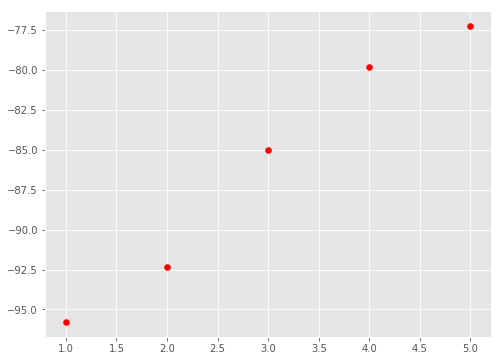

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

E_m0 = np.zeros([5, 5])

for i in range(5):
    E_m0[0, i] = energy_two[0][i, start:end].mean()
    
ax.scatter(np.arange(1, 6), E_m0[0], color='red')
    
plt.show()

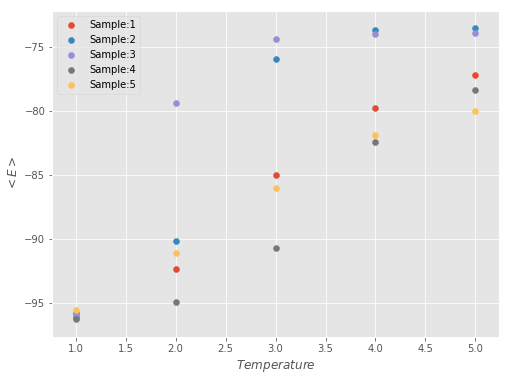

In [37]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
E_m0 = np.zeros([5, 5])

for i in range(5):
    for j in range(5):
        E_m0[i, j] = energy_two[i][j, start:end].mean()
    
    ax.scatter(np.arange(1, 6), E_m0[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

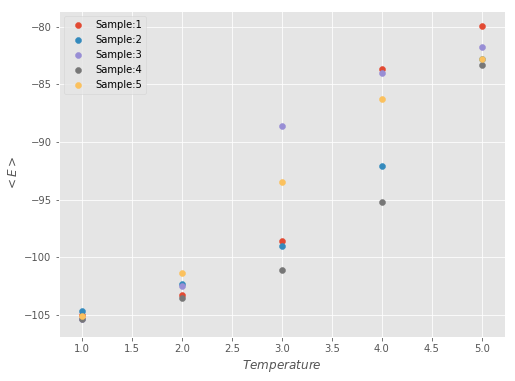

In [38]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
E_m1 = np.zeros([5, 5])

for i in range(5):
    for j in range(5):
        E_m1[i, j] = energy_two[i][9-j, start:end].mean()
    
    ax.scatter(np.arange(1, 6), E_m1[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_xlabel('$Temperature$')
ax.set_ylabel('$<E>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()

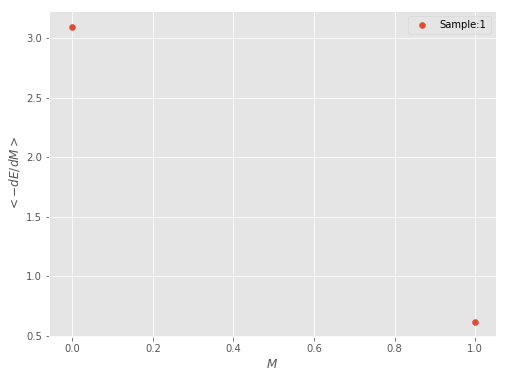

In [41]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
dE_two = np.zeros([2, 5])

for j in range(5):
    dE_two[0, j] = dlogp_two_m0[j][start:end].mean()
    dE_two[1, j] = dlogp_two_m1[j][start:end].mean()
    
for i in range(1):
    ax.scatter(np.array([0]), dE_two[0, i], color=cycle[i], label='Sample:{}'.format(i+1))
    ax.scatter(np.array([1]), dE_two[1, i], color=cycle[i])

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig2.png')
plt.show()